In [1]:
from PIL import Image
import cv2
import numpy as np

import os
import json
import random
from glob import glob

import detectron2
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [2]:
import torch

torch.cuda.is_available()

True

In [ ]:
cfg = get_cfg()
cfg.INPUT.MASK_FORMAT='bitmask'
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.WEIGHTS = "best_model_bench.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
predictor = DefaultPredictor(cfg)

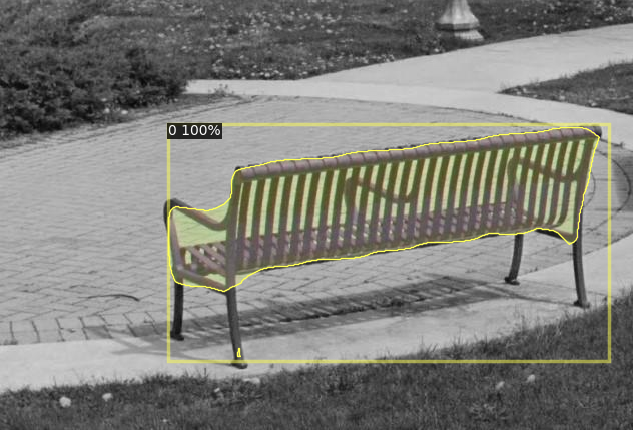

In [ ]:
# change the img path if you want to test your own image.

im = cv2.imread("61_jpg.rf.4e147b7acbea1a7ded08a22b42d1f0ec.jpg")
ori_size = im.shape[:2]
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                scale=1,
                instance_mode=ColorMode.IMAGE_BW
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
display(Image.fromarray(out.get_image()[:, :, ::-1]))